In [1]:
import sys
sys.path.append("../dependencies/geometric-algebra-transformer")
sys.path.append("../")

import torch
import torch.nn as nn
from ezgatr.interfaces import point, rotation
from pytorch3d.utils import ico_sphere
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.transforms import random_rotation, matrix_to_quaternion
from pytorch3d.loss import chamfer_distance

from src.dataloader import load_normalized_mesh_from_obj
from src.model_gatr import Img2PCModelConfig, Img2PCModel
from src.visualization import plot_normalized_point_cloud

In [2]:
m = load_normalized_mesh_from_obj("../data/raw/model/bed/IKEA_MALM_2/model.obj", normalize=False)

In [8]:
R = torch.tensor(
    [
        [
            0.7813941591465821,
            0.00095539348511137,
            -0.6240370624208909
        ],
        [
            0.17456672296585038,
            0.9597407704535225,
            0.2200547949085482
        ],
        [
            0.5991240499968018,
            -0.2808856364297893,
            0.749769052417384
        ]
    ]
)
T = torch.tensor(
    [
        -0.00024347016915001151,
        0.09068297313399999,
        1.15264868244
    ]
)

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

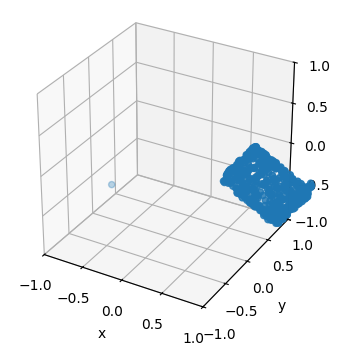

In [18]:
pc = torch.cat(
    [
        torch.einsum(
            "bni, ji -> bnj",
            sample_points_from_meshes(m, 512),
            R
        ) + T,
        torch.tensor(
            [
                -0.7062195301276326,
                0.2367305448542897,
                -0.8843274678670282
            ]
        ).view(1, 1, 3)
    ],
    dim=1
)
# pc = sample_points_from_meshes(m, 2048)
# pc = pc[..., [1, 2, 0]]
plot_normalized_point_cloud(pc[..., [2, 1, 0]])

In [ ]:
noise = torch.randn((8, 512, 1, 16), device="cuda")
vision_embedding = torch.randn((8, 16, 768), device="cuda")

In [ ]:
cfg = Img2PCModelConfig()
net = Img2PCModel(cfg).to("cuda")

In [ ]:
pc = net(noise, vision_embedding)
pc.shape